The goal os `punk` is to make available sime wrappers for a variety of machine learning pipelines.

The pipelines are termed `primitves` and each primitive is designed with a functional programming approach in mind.

At the time of this writing, `punk` is being periodically updated. Any new primitives will be realesed as a pip-installable python package every friday along with their corresponding annotations files for the broader D3M community.

Here we will briefly show how the primitives in the punk package can be utilized.

In [3]:
import punk
help(punk)

Help on package punk:

NAME
    punk

PACKAGE CONTENTS
    feature_selection (package)
    novelty_detection (package)
    utils (package)

DATA
    __all__ = ['feature_selection', 'novelty_detection', 'utils']

VERSION
    0.1.3dev1

FILE
    /home/alarcj/Documents/datasci/NewKnowledge/primitives_repo/CODE/examples/punk/__init__.py




# Novelty Detection - Dataset Summarization

## Testing Heteroscedasticity

In [4]:
from punk import novelty_detection

In [3]:
n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

In [5]:
%%time

test_homo = novelty_detection.heteroscedasticity.test_heteroscedasticity(X_homo, max_iter=1000, tol=0.01)

CPU times: user 16 s, sys: 17.2 s, total: 33.2 s
Wall time: 10.7 s


In [6]:
%%time

test_hetero = novelty_detection.heteroscedasticity.test_heteroscedasticity(X_hetero, max_iter=1000, tol=0.01)

CPU times: user 16.2 s, sys: 17.9 s, total: 34.1 s
Wall time: 13.1 s


In [7]:
print(test_homo)
print(test_hetero)

{'pca': (-74.953690343714229, 10), 'fa': (-75.029704299751259, 10)}
{'pca': (-77.659865847140864, 40), 'fa': (-76.948541495525788, 10)}


### Compute Scores

In [13]:
pca_scores_ho, fa_scores_ho = novelty_detection.compute_scores(X_homo, max_iter=1000, tol=0.01)
pca_scores_he, fa_scores_he = novelty_detection.compute_scores(X_hetero, max_iter=1000, tol=0.01)

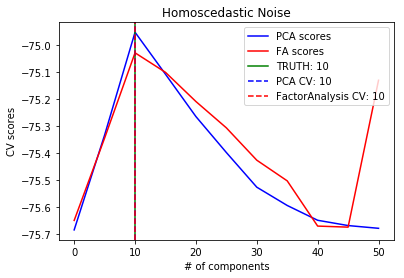

In [21]:
plt.plot([x for y, x in pca_scores_ho], [y for y, x in pca_scores_ho], 'b', label='PCA scores')
plt.plot([x for y, x in fa_scores_ho], [y for y, x in fa_scores_ho], 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(test_homo["pca"][1], color='b', label='PCA CV: %d' %test_homo["pca"][1] , linestyle='--')
plt.axvline(test_homo["fa"][1], color='r', label='FactorAnalysis CV: %d' % test_homo["fa"][1], linestyle='--')

plt.xlabel("# of components")
plt.ylabel("CV scores")
plt.legend(loc="best")
plt.title("Homoscedastic Noise");

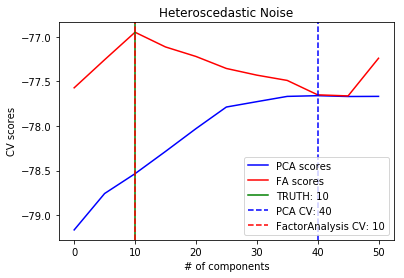

In [22]:
plt.plot([x for y, x in pca_scores_he], [y for y, x in pca_scores_he], 'b', label='PCA scores')
plt.plot([x for y, x in fa_scores_he], [y for y, x in fa_scores_he], 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(test_hetero["pca"][1], color='b', label='PCA CV: %d' %test_hetero["pca"][1] , linestyle='--')
plt.axvline(test_hetero["fa"][1], color='r', label='FactorAnalysis CV: %d'%test_hetero["fa"][1], linestyle='--')

plt.xlabel("# of components")
plt.ylabel("CV scores")
plt.legend(loc="best")
plt.title("Heteroscedastic Noise");